In [1]:
%matplotlib inline
import pandas as pd
import librosa as lib
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Audio
import scipy

In [2]:
#Import music dataframe
music = pd.read_pickle('DFS/music_clean.pkl')

In [3]:
#Import motion dataframe
motion1 = pd.read_pickle('DFS/Participant_Motion/PID_motion_1.pkl')

Reminder of what each look like

In [4]:
music.head()

,C,C_sharp,D,D_sharp,E,F,F_sharp,G,G_sharp,A,A_sharp,B
0,0.391866,0.271475,0.543743,0.414470,0.615711,0.905505,0.693868,1.0,0.873349,0.428765,0.196232,0.178688
1,0.391006,0.270759,0.542460,0.419167,0.611465,0.895052,0.696120,1.0,0.865096,0.424725,0.202718,0.177431
2,0.384290,0.269616,0.530845,0.424728,0.596871,0.879191,0.701280,1.0,0.854621,0.410783,0.205452,0.178596
3,0.368410,0.266402,0.511752,0.433351,0.582881,0.878751,0.706602,1.0,0.850467,0.397394,0.211017,0.174648
4,0.356740,0.260931,0.492235,0.435323,0.570510,0.877007,0.707534,1.0,0.849687,0.381047,0.214705,0.177209


### Music EDA

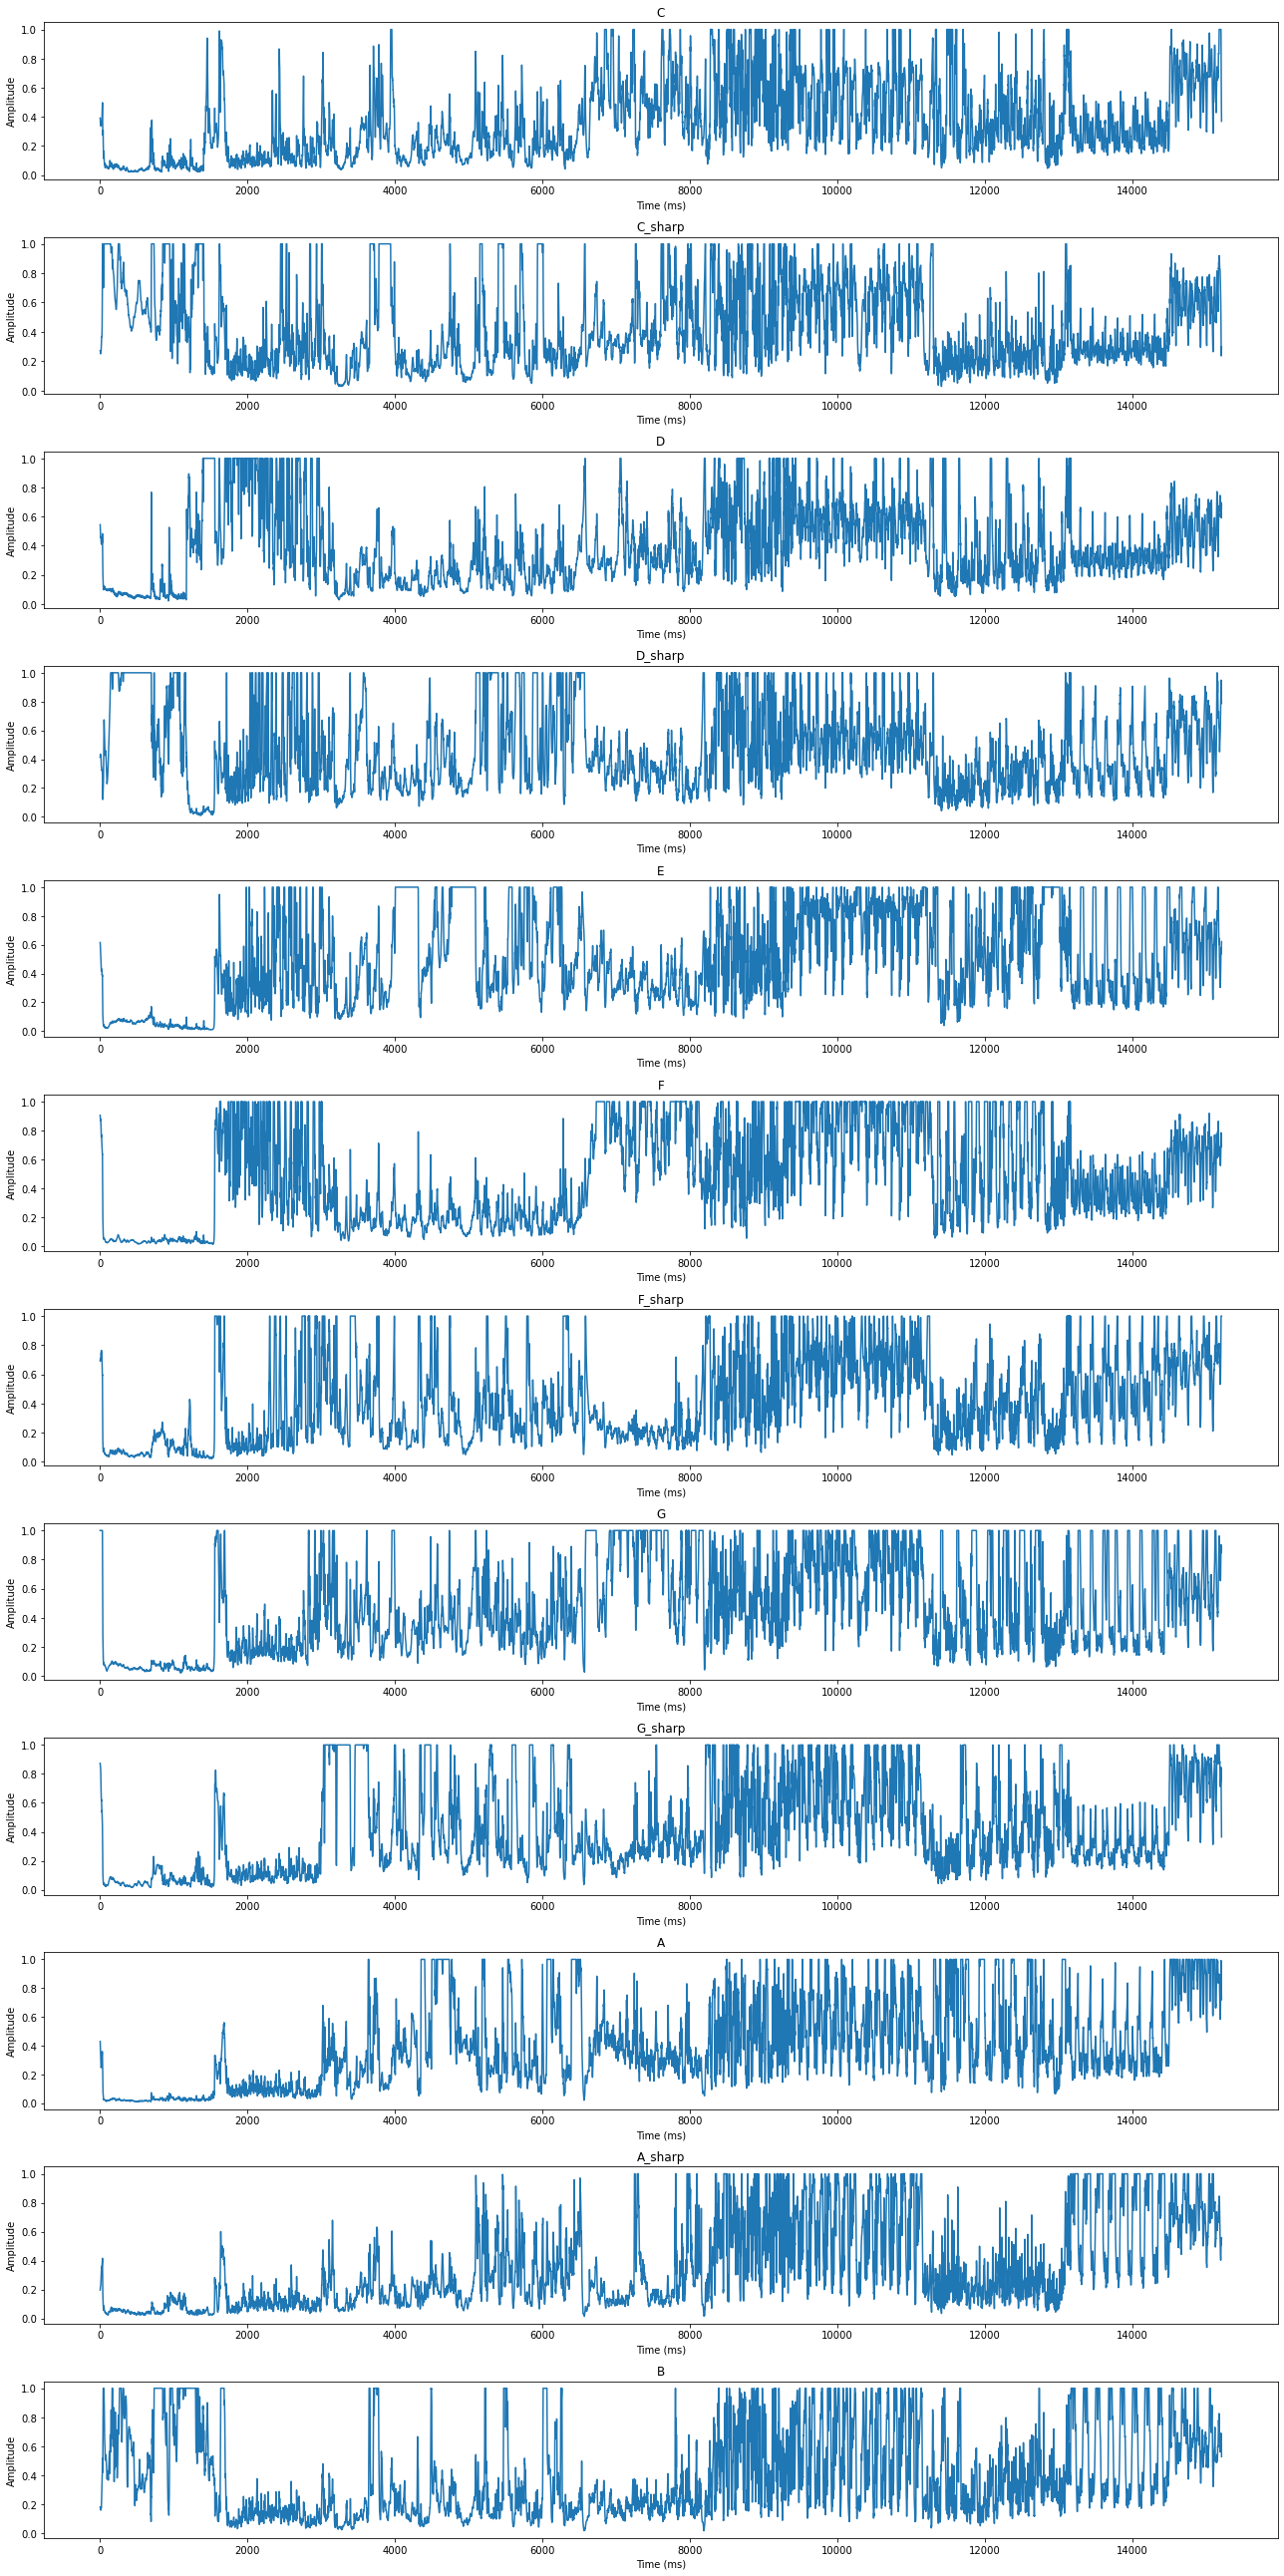

In [5]:
#Visualizing each note for full 3 minutes
fig, axes = plt.subplots(12, 1, figsize=(18, 36))
for axs in range(0,12):
    music.iloc[:,axs].plot(ax=axes[axs])
    axes[axs].set_xlabel('Time (ms)')
    axes[axs].set_ylabel('Amplitude')
    axes[axs].set_title(music.columns[axs])
plt.tight_layout()
plt.show()

We can zoom in to a 20 sec portion of the song to better visualize the changes over time

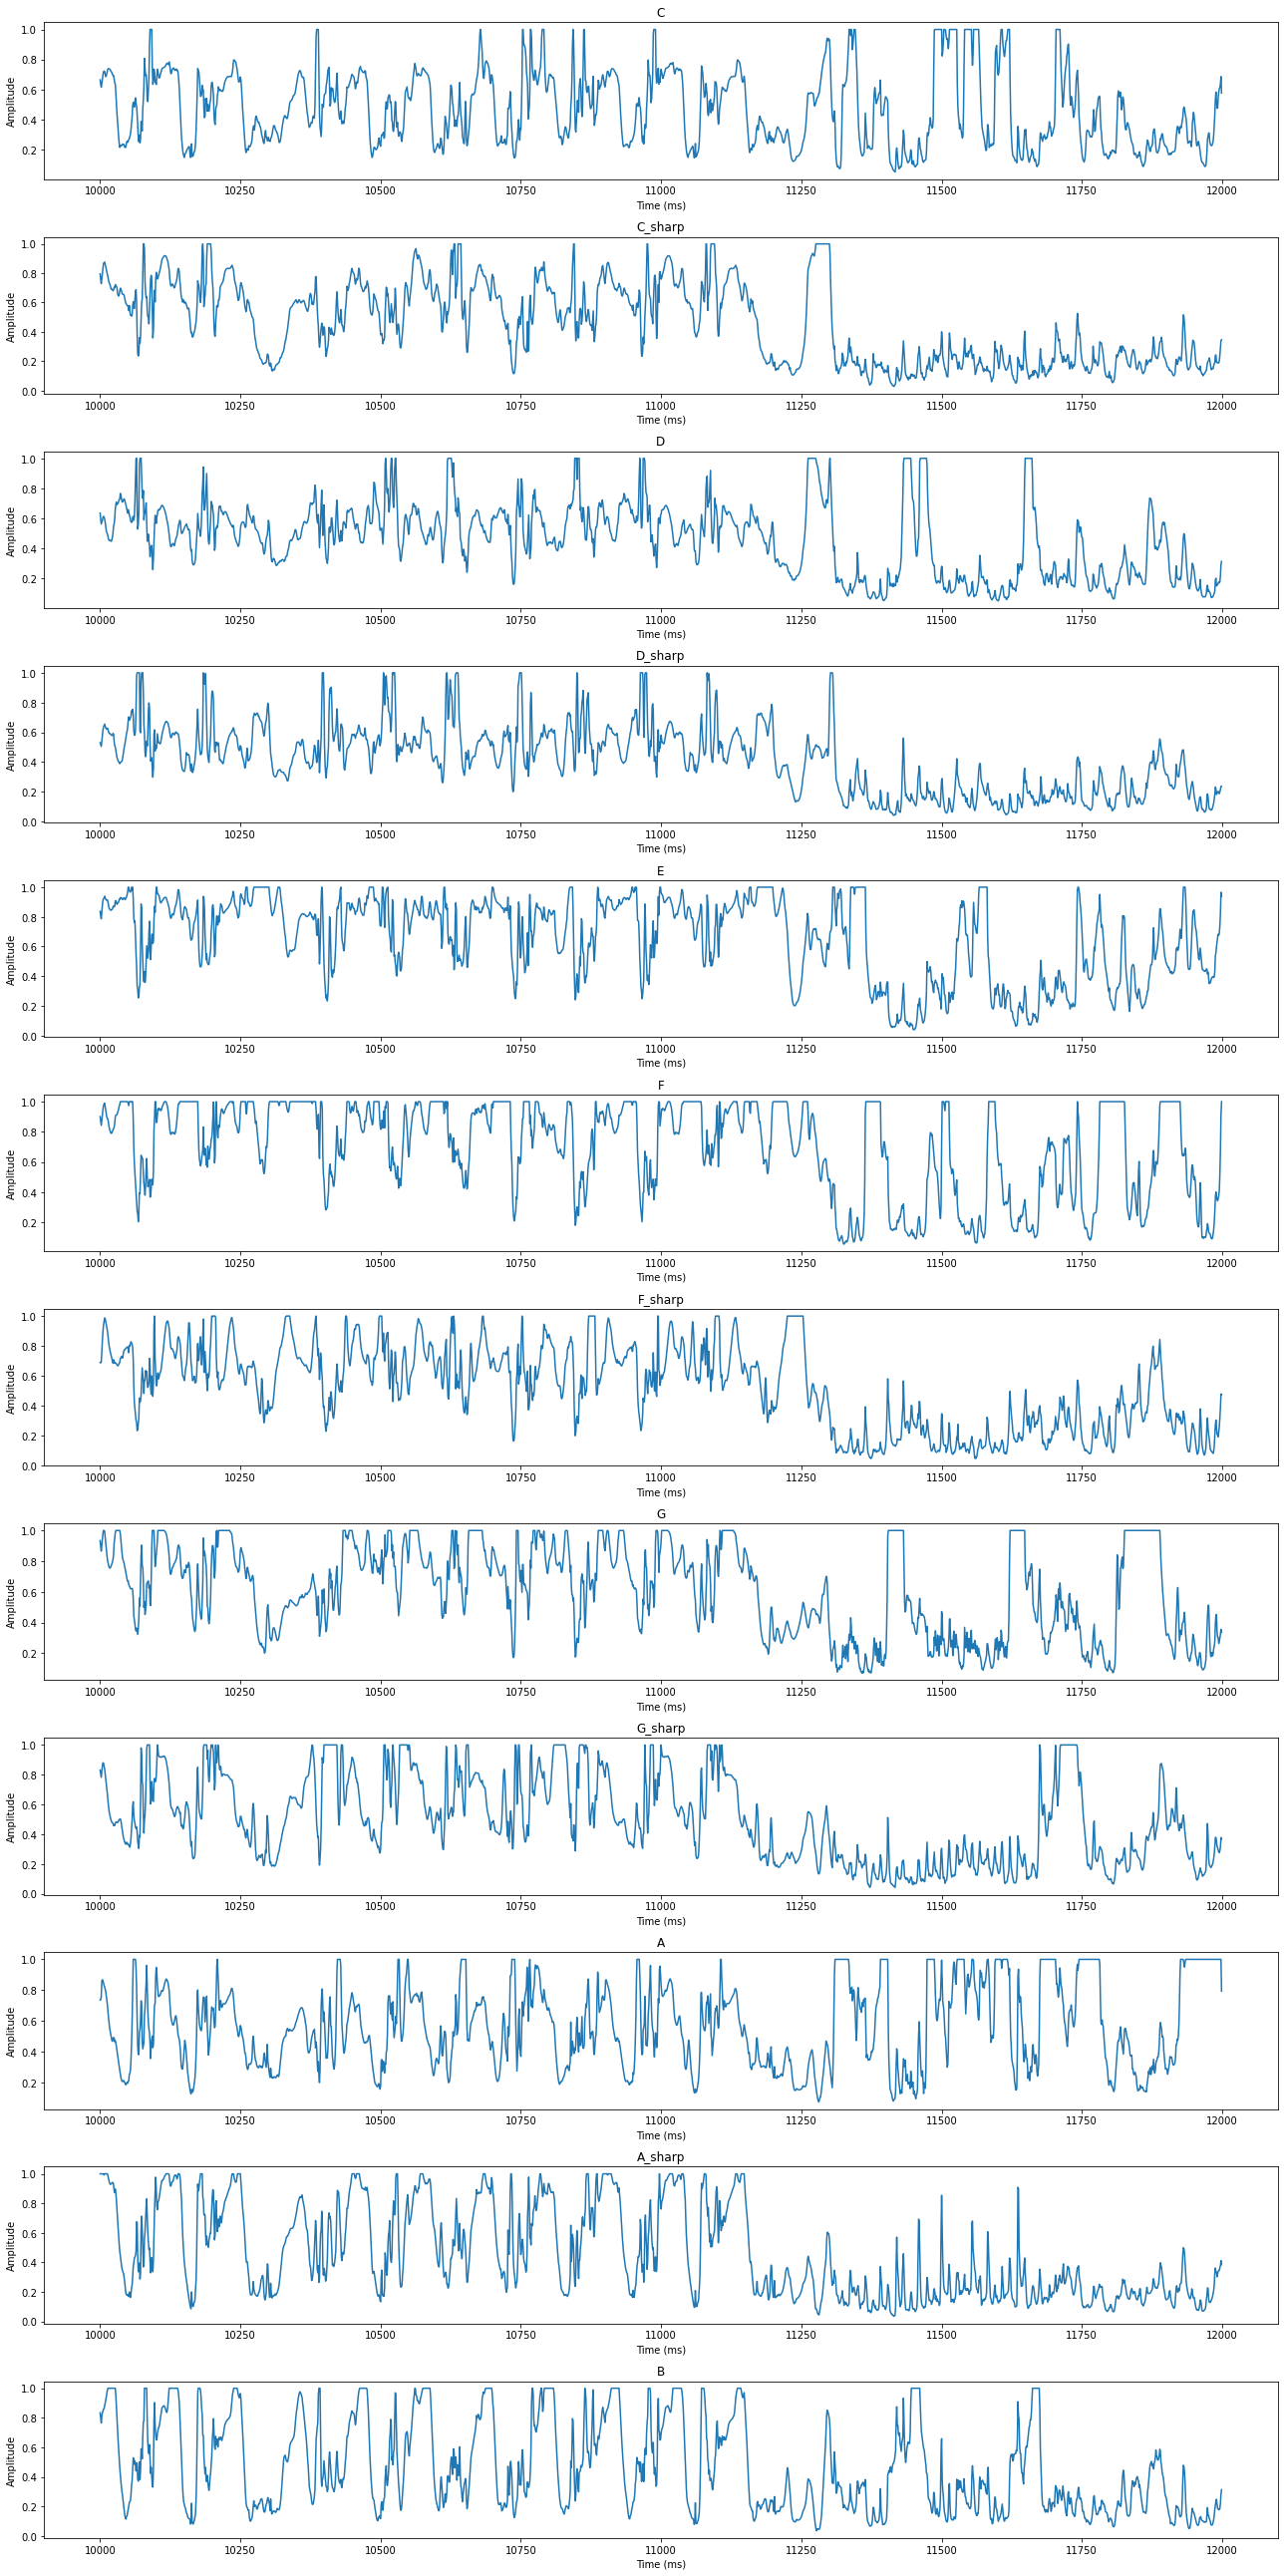

In [6]:
#Zooming into some busier sections to see the differences more clearly
fig, axes = plt.subplots(12, 1, figsize=(18, 36))
for axs in range(0,12):
    music.iloc[10000:12000,axs].plot(ax=axes[axs])
    axes[axs].set_xlabel('Time (ms)')
    axes[axs].set_ylabel('Amplitude')
    axes[axs].set_title(music.columns[axs])
plt.tight_layout()
plt.show()

We can see that the energy asscoaited with each note changes differently over time. We are interested in if any of the notes are more coorelated to momvement than others or if intensity levels of certain notes have common effects.

In [7]:
music.describe()

,C,C_sharp,D,D_sharp,E,F,F_sharp,G,G_sharp,A,A_sharp,B
count,15216.000000,15216.000000,15216.000000,15216.000000,15216.000000,15216.000000,15216.000000,15216.000000,15216.000000,15216.000000,15216.000000,15216.000000
mean,0.355950,0.422432,0.388187,0.460801,0.494961,0.471589,0.399323,0.471158,0.410806,0.402099,0.350489,0.394583
std,0.254600,0.268794,0.264893,0.277643,0.310641,0.328595,0.279170,0.310781,0.298266,0.297253,0.294058,0.295771
min,0.021398,0.027630,0.020229,0.010507,0.009348,0.012805,0.020542,0.021034,0.015816,0.008196,0.014128,0.016334
25%,0.154171,0.210024,0.186118,0.240680,0.244267,0.182540,0.166658,0.211641,0.177104,0.170773,0.117388,0.160677
50%,0.288809,0.339509,0.315681,0.389827,0.437326,0.405418,0.325364,0.401182,0.321185,0.333330,0.237105,0.287121
75%,0.521340,0.604895,0.549157,0.625001,0.775162,0.761341,0.608919,0.721626,0.610875,0.591950,0.532748,0.584161
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [8]:
#set the music dataframe index to a time series and upsamplt to match the 100 readings per second from the motion data
music.set_index(pd.timedelta_range(start='180 S', end='356 S', periods=15216), inplace=True)
musicr = music.resample('10L').mean().ffill()

Let's visually confirm thet the resample took and didn't create any issues for the data

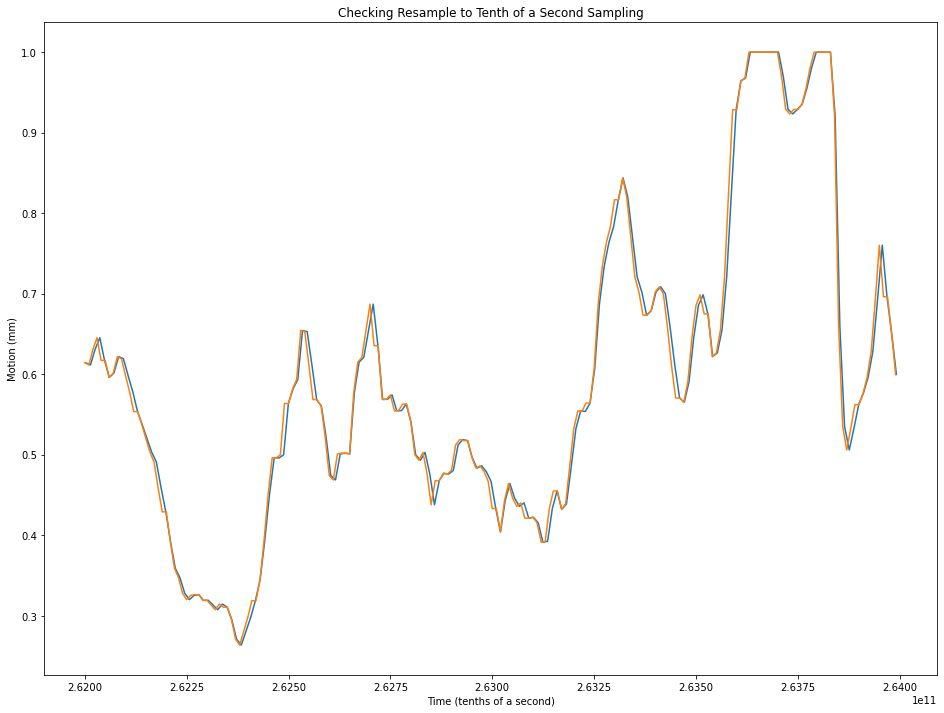

In [9]:
#PLotting original music data vs. resampled data to confirm the data statyed consistent
plt.figure(figsize=(16, 12))
plt.plot(music['00:04:22':'00:04:23']['C'])
plt.plot(musicr['00:04:22':'00:04:23']['C'])
plt.title('Checking Resample to Tenth of a Second Sampling')
plt.ylabel('Motion (mm)')
plt.xlabel('Time (tenths of a second)')
plt.show()

Looks good. The data is a little jumpier because of less datapoints, but follows the same trends.

In [10]:
#Drop datetime index as milliseconds will be used instead
musicr.reset_index(drop=True, inplace=True)

In [11]:
#Output for use in model
musicr.to_pickle('DFS/musicr.pkl')